In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
yelp, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)
train_data, test_data = yelp['train'], yelp['test']

In [3]:
yelp

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

In [9]:
def append_to_lists(ds, sentences_list, labels_list):
    for sentence, label in tfds.as_numpy(ds):
        sentences_list.append(sentence.decode('utf=8'))
        labels_list.append(label)


In [11]:
append_to_lists(train_data, train_sentences, train_labels)
append_to_lists(test_data, test_sentences, test_labels)

2024-08-30 10:33:35.180266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-30 10:33:37.245528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
train_sentences_np = np.array(train_sentences)
train_labels_np = np.array(train_labels)
test_sentences_np = np.array(test_sentences)
test_labels_np = np.array(test_labels)

In [23]:
num_words = 10000
oov_token = "<OOV>"
embedding_dim = 16
maxlen = 150
truncate = 'post'

In [18]:
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences_np)
train_sequences = tokenizer.texts_to_sequences(train_sentences_np)
test_sequences = tokenizer.texts_to_sequences(test_sentences_np)

In [19]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen, truncating=truncate)
test_padded = pad_sequences(test_sequences, maxlen=maxlen, truncating=truncate)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(train_padded, train_labels_np, epochs=10, validation_data=(test_padded, test_labels_np))

Epoch 1/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 0.8816 - loss: 0.2761 - val_accuracy: 0.9213 - val_loss: 0.1949
Epoch 2/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9188 - loss: 0.1989 - val_accuracy: 0.9217 - val_loss: 0.1955
Epoch 3/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9233 - loss: 0.1892 - val_accuracy: 0.9191 - val_loss: 0.1996
Epoch 4/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9264 - loss: 0.1817 - val_accuracy: 0.9217 - val_loss: 0.1947
Epoch 5/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9292 - loss: 0.1763 - val_accuracy: 0.9188 - val_loss: 0.2033
Epoch 6/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9316 - loss: 0.1709 - val_accuracy: 0.9197 - val_loss: 0.1985
Epoch 7/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9334 - loss: 0.1667 - val_accuracy: 0.9177 - val_loss: 0.2049
Epoch 8/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 

In [ ]:
# https://raw.githubusercontent.com/cbtn-data-science-ml/introduction-to-deep-learning/main/model_utils.py

In [32]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    """
    Plots the loss and accuracy curves for training and testing.

    Args:
        history: History returned by the fit method.
    """
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()


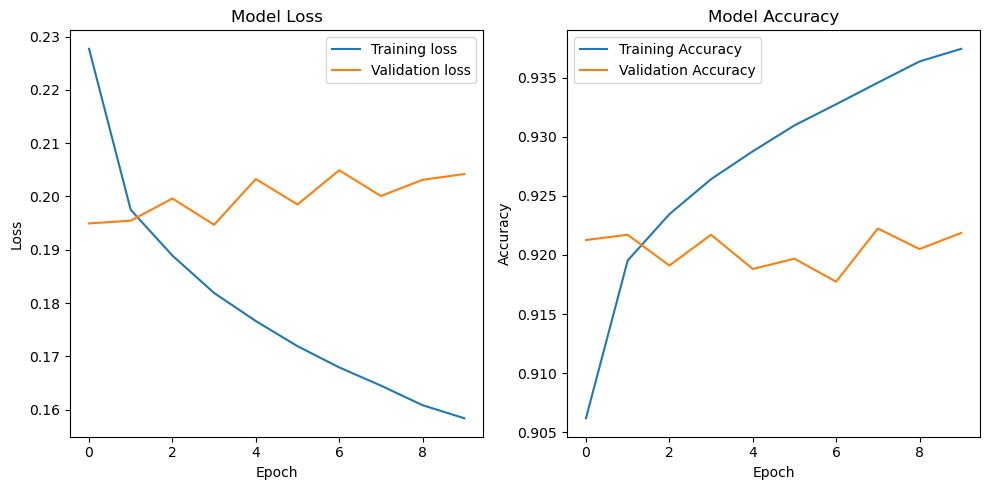

In [33]:
plot_loss_and_accuracy(history)